In [2]:
# Import modules
from sklearn.neighbors import KNeighborsClassifier

import os
from pathlib import Path

import cv2
import matplotlib.pyplot as plt

c:\Users\CSR\anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\CSR\anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\CSR\anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
# Get train and test data directory path
data_path = Path("./data")
train_path = data_path / "traindata"
test_path = data_path / "testdata"

train_path, test_path

(WindowsPath('data/traindata'), WindowsPath('data/testdata'))

In [7]:
# Get 100 train image paths from men and women
train_images = list(train_path.glob("men/*.jpg"))[:100]+list(train_path.glob("women/*.jpg"))[:100]

# Make list of train images and labels
classes = ["men", "women"]
images = []
labels = []

for path in train_images:
    labels.append(classes.index(str(path.parent).split("\\")[-1]))
    img = cv2.imread(str(path))
    img = cv2.resize(img, (256, 256)).flatten()
    images.append(img)

print(f"length of train images: {len(images)} and length of train labels: {len(labels)}")

length of train images: 200 and length of train labels: 200


In [8]:
# Set k value
k = 11

# Get KNN model with 11 neightbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model
model.fit(images, labels)

KNeighborsClassifier(n_neighbors=11)

In [9]:
# Get 100 test image paths from both men and women
test_images = list(test_path.glob("men/*.jpg"))[:100]+list(test_path.glob("women/*.jpg"))[:100]
classes = ["men", "women"]
acc = []

# Check model prediction and label is same
for path in test_images:
    label = classes.index(str(path.parent).split("\\")[-1])
    img = cv2.imread(str(path))
    img = cv2.resize(img, (256, 256)).flatten()
    pred = model.predict(img.reshape(1, -1))
    acc.append(label==pred[0])

# Calculate accuracy of model
accuracy = sum(acc)/len(acc)
print(f"Accurracy of KNN with {k} neightbors is {accuracy}")

Accurracy of KNN with 11 neightbors is 0.635


In [10]:
# Do the same experiment with 3 neighbors

# Set k value
k = 3

# Get KNN model with 11 neightbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model
model.fit(images, labels)

# Get 100 test image paths from both men and women
test_images = list(test_path.glob("men/*.jpg"))[:200]+list(test_path.glob("women/*.jpg"))[:200]
classes = ["men", "women"]
acc = []

# Check model prediction and label is same
for path in test_images:
    label = classes.index(str(path.parent).split("\\")[-1])
    img = cv2.imread(str(path))
    img = cv2.resize(img, (256, 256)).flatten()
    pred = model.predict(img.reshape(1, -1))
    acc.append(label==pred[0])

# Calculate accuracy of model
accuracy = sum(acc)/len(acc)
print(f"Accurracy of KNN with {k} neightbors is {accuracy}")

Accurracy of KNN with 3 neightbors is 0.595


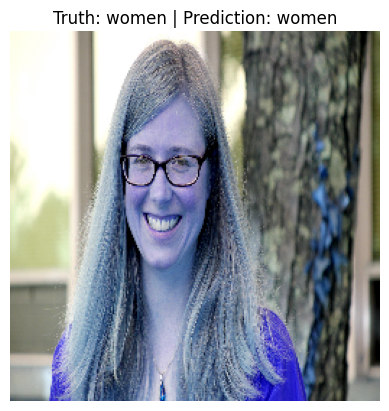

In [45]:
import random

# Get random index to test image
rand_idx = random.randint(0, len(test_images)-1)
testing_path = test_images[rand_idx] # Or you can put your own image path here!

# Get image, truth label and prediction of test image
img = cv2.imread(str(testing_path))
img = cv2.resize(img, (256, 256))
label = str(testing_path.parent).split("\\")[-1]
pred = model.predict(img.flatten().reshape(1, -1))[0]

# Show image with truth label and prediction
plt.imshow(img)
plt.title(f"Truth: {label} | Prediction: {classes[pred]}")
plt.axis(False);